In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def center_data(X):
    mean_vals = np.mean(X, axis=0)
    centered_data = X - mean_vals
    return centered_data, mean_vals

In [3]:
def calculate_covariance_matrix(X):
    m = X.shape[0]
    covariance_matrix = (1 / (m - 1)) * np.dot(X.T, X)
    return covariance_matrix

In [4]:
def pca(X, num_components=None):
    centered_data, mean_vals = center_data(X)
    cov_matrix = calculate_covariance_matrix(centered_data)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalues = np.real_if_close(eigenvalues, 1)
    eigenvectors = np.real_if_close(eigenvectors, 1)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]
    if num_components is not None:
        eigenvectors = eigenvectors[:, :num_components]
        eigenvalues = eigenvalues[:num_components]
    transformed_data = np.dot(centered_data, eigenvectors)
    return transformed_data, eigenvectors, eigenvalues, mean_vals

In [5]:
def compress_image(image_path, num_components):
    img = Image.open(image_path).convert('L')
    img_data = np.array(img)
    original_shape = img_data.shape
    flattened_img_data = img_data.reshape(-1, img_data.shape[1])
    
    transformed_data, principal_components, explained_variance, mean_vals = pca(flattened_img_data, num_components)
    
    reconstructed_data = np.dot(transformed_data, principal_components.T) + mean_vals
    reconstructed_image = reconstructed_data.reshape(original_shape)
    
    original_size = img_data.size
    compressed_size = transformed_data.size + principal_components.size + mean_vals.size
    return reconstructed_image, original_shape, original_size, compressed_size


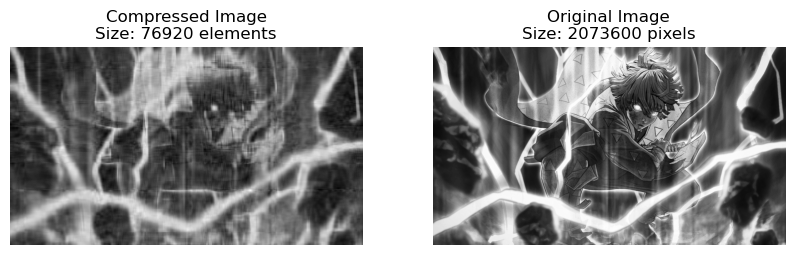

Original Image Size: 1920x1080 pixels, 2073600 elements total
Compressed Size: 76920 elements total
Compression Ratio: 26.96:1


In [21]:
image_path = 'TestImage1.jpg'  
num_components = 25
compressed_image, original_shape, original_size, compressed_size = compress_image(image_path, num_components)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Image\nSize: {compressed_size} elements')
plt.axis('off')

plt.subplot(1, 2, 2)
original_img = Image.open(image_path).convert('L')
plt.imshow(original_img, cmap='gray')
plt.title(f'Original Image\nSize: {original_size} pixels')
plt.axis('off')

plt.show()

print(f'Original Image Size: {original_shape[1]}x{original_shape[0]} pixels, {original_size} elements total')
print(f'Compressed Size: {compressed_size} elements total')
compression_ratio = original_size / compressed_size
print(f'Compression Ratio: {compression_ratio:.2f}:1')